In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read exp_kriging_output.csv
doe = pd.read_csv("exp_hk_input.csv", index_col=0)
results = pd.read_csv("exp_hk_output.csv", index_col=0)

In [3]:
# merge doe and results
doe_results = pd.merge(doe, results, left_index=True, right_index=True)

In [4]:
doe_results

,method,num_hf,num_lf,problem,seed,progress,normalized_mae,normalized_rmse,r2,cpu_time
0,hk,2,25,Forrester_1a,1,finished,0.023619,0.006504,1.000000,0.951801
1,hk,4,25,Forrester_1a,1,finished,0.002894,0.000409,1.000000,0.968813
2,hk,6,25,Forrester_1a,1,finished,0.003236,0.000445,1.000000,1.007210
3,hk,8,25,Forrester_1a,1,finished,0.002814,0.000398,1.000000,0.827055
4,hk,10,25,Forrester_1a,1,finished,0.002972,0.000414,1.000000,0.860987
...,...,...,...,...,...,...,...,...,...,...
12995,hk,12,120,mf_Sixhump,5,finished,0.114740,0.017306,0.999843,15.433115
12996,hk,14,120,mf_Sixhump,5,finished,0.044358,0.007289,0.999972,14.942773
12997,hk,16,120,mf_Sixhump,5,finished,0.045689,0.005787,0.999982,14.930625
12998,hk,18,120,mf_Sixhump,5,finished,0.028821,0.002630,0.999996,14.649192


In [5]:
doe_results["problem"].values

array(['Forrester_1a', 'Forrester_1a', 'Forrester_1a', ..., 'mf_Sixhump',
       'mf_Sixhump', 'mf_Sixhump'], dtype=object)

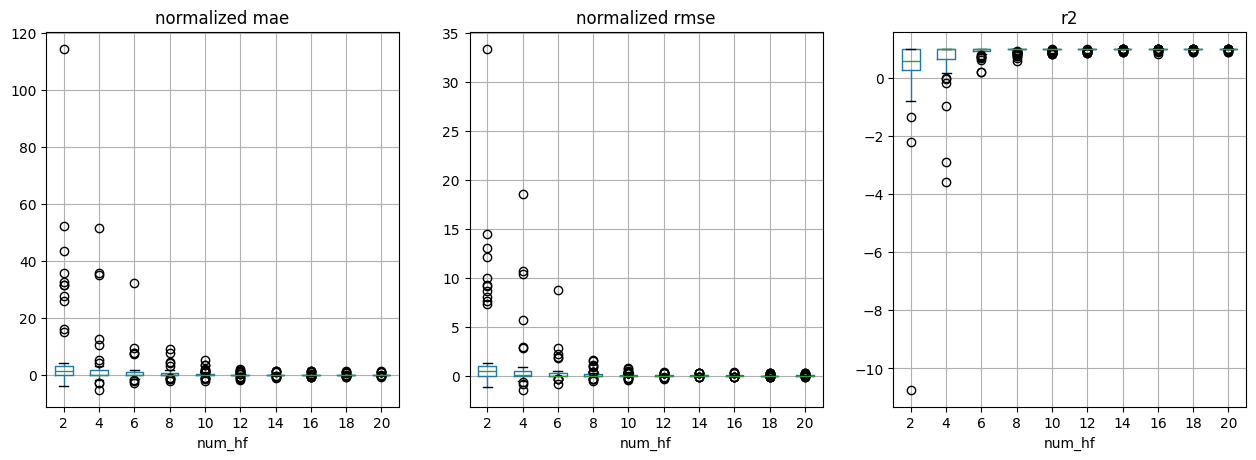

In [6]:
# get function name from problem column
# get a sub-dataframe with only specific problem
doe_results_1b = doe_results[doe_results["num_lf"] == 120]


# plot boxplot regarding mae, mse r2 with respect to different number of samples on  Forrester 1b function
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
doe_results_1b.boxplot(column=["normalized_mae"], by="num_hf", ax=ax[0])
doe_results_1b.boxplot(column=["normalized_rmse"], by="num_hf", ax=ax[1])
doe_results_1b.boxplot(column=["r2"], by="num_hf", ax=ax[2])
ax[0].set_title("normalized mae")
ax[1].set_title("normalized rmse")
ax[2].set_title("r2")
plt.suptitle("")
plt.show()

Text(0.5, 1.0, 'normalized mae')

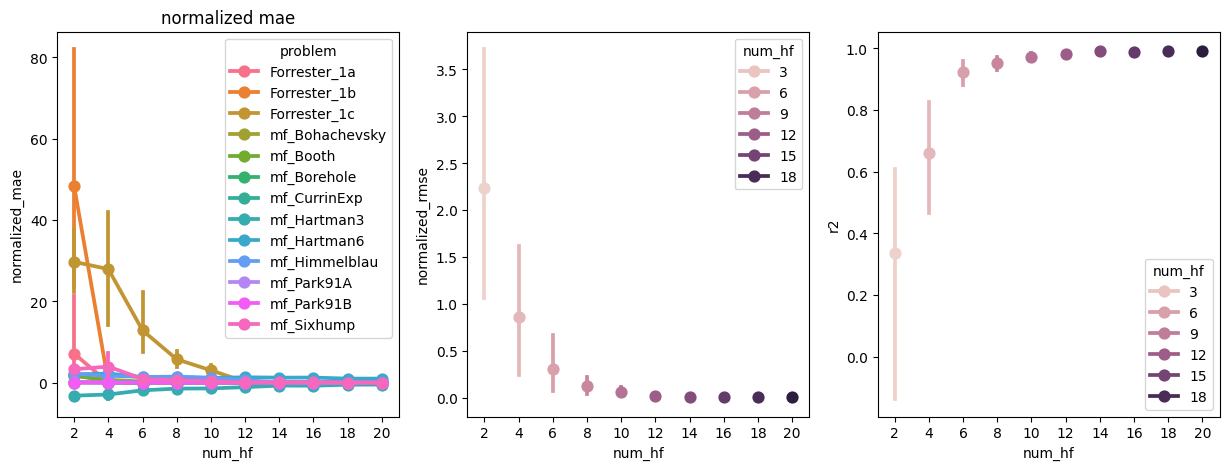

In [11]:
# plot season plot regarding mae, mse r2 with respect to different number of samples on  Forrester 1b function
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.pointplot(x="num_hf", y="normalized_mae", hue="problem",
              data=doe_results_1b, ax=ax[0])
sns.pointplot(x="num_hf", y="normalized_rmse",
              hue="num_hf", data=doe_results_1b, ax=ax[1])
sns.pointplot(x="num_hf", y="r2", hue="num_hf", data=doe_results_1b, ax=ax[2])

ax[0].set_title("normalized mae")

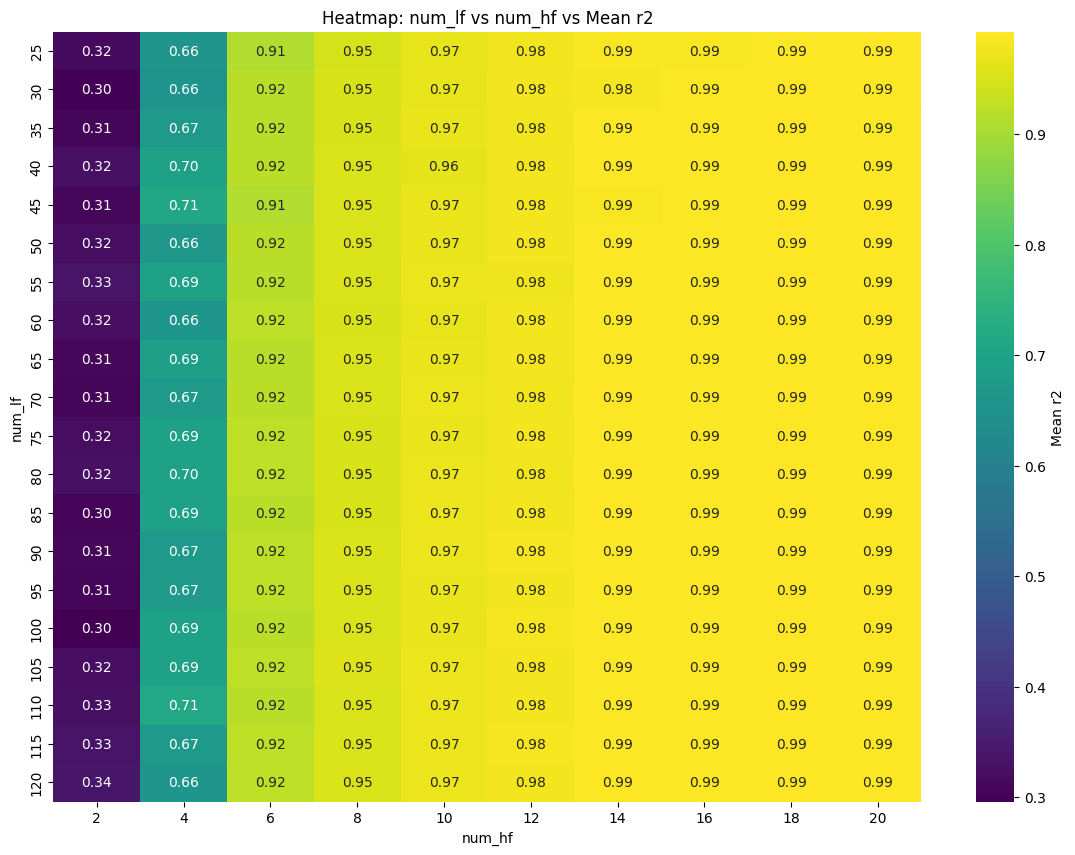

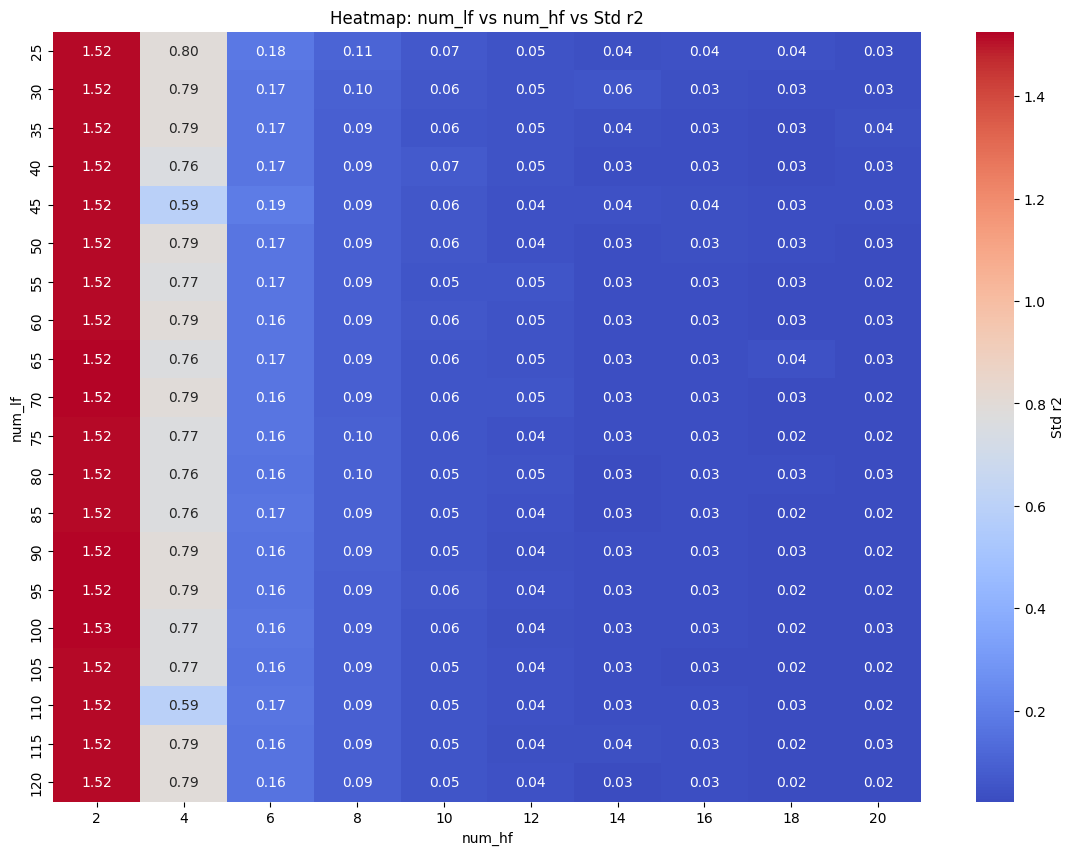

In [8]:


# Create a pivot table for num_lf, num_hf, mean, and std of r2
pivot_table = doe_results.pivot_table(
    values="r2", index="num_lf", columns="num_hf", aggfunc=["mean", "std"]
)

# Create a heatmap with mean values
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_table["mean"],
    annot=True,
    cmap="viridis",
    fmt=".2f",
    cbar_kws={"label": "Mean r2"},
)
plt.title("Heatmap: num_lf vs num_hf vs Mean r2")
plt.xlabel("num_hf")
plt.ylabel("num_lf")
plt.show()

# Create a heatmap with std values
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_table["std"],
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    cbar_kws={"label": "Std r2"},
)
plt.title("Heatmap: num_lf vs num_hf vs Std r2")
plt.xlabel("num_hf")
plt.ylabel("num_lf")
plt.show()

/tmp/ipykernel_85124/1000882201.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations_mean = pivot_table["mean"].applymap(
/tmp/ipykernel_85124/1000882201.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table["std"].applymap("{:.2f}".format).astype(str).values


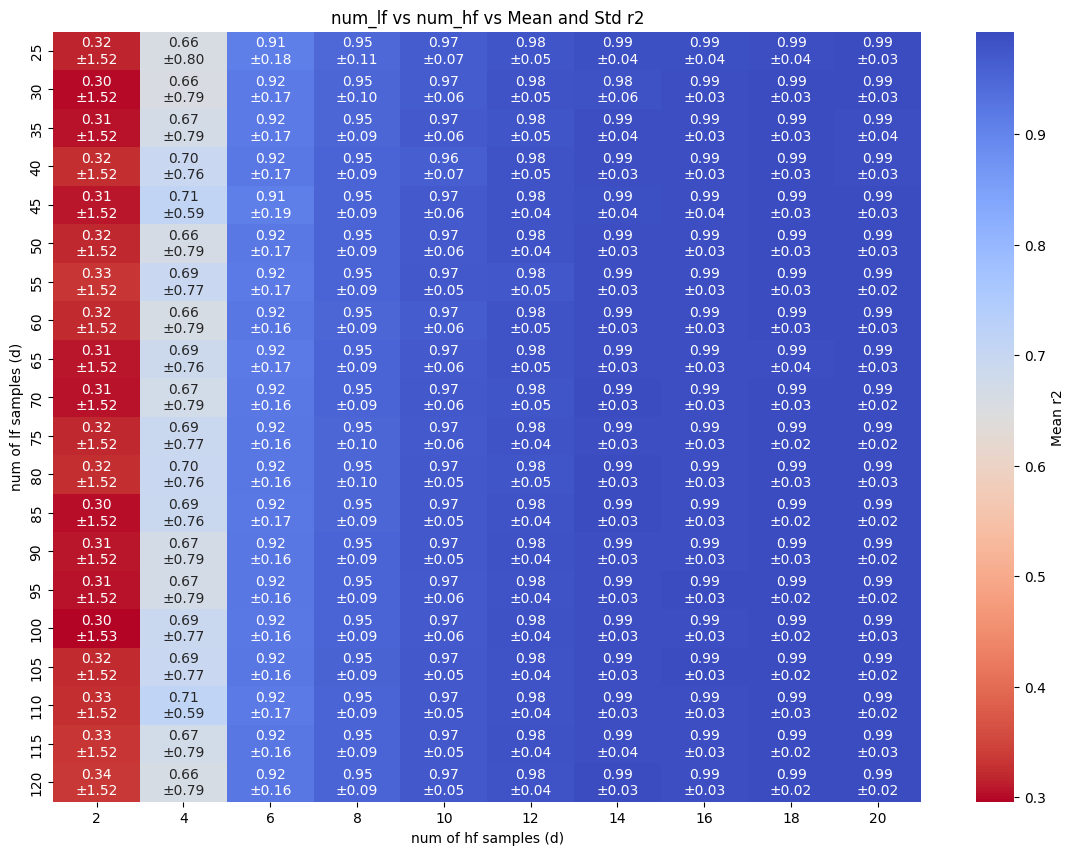

In [9]:
# Create a pivot table for num_lf, num_hf, mean, and std of r2
pivot_table = doe_results.pivot_table(
    values="r2", index="num_lf", columns="num_hf", aggfunc=["mean", "std"]
)

# Create a custom annotation array with both mean and std values
annotations_mean = pivot_table["mean"].applymap(
    "{:.2f}".format).astype(str).values
annotations_std = "±" + \
    pivot_table["std"].applymap("{:.2f}".format).astype(str).values

# Combine annotations
annotations_combined = [
    f"{m}\n{s}" for m, s in zip(annotations_mean.flatten(), annotations_std.flatten())
]
annotations_combined = np.array(
    annotations_combined).reshape(annotations_mean.shape)

# Create a combined heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_table["mean"],
    annot=annotations_combined,
    fmt="",
    cmap="coolwarm_r",
    cbar_kws={"label": "Mean r2"},
)
plt.title("num_lf vs num_hf vs Mean and Std r2")
plt.xlabel("num of hf samples (d)")
plt.ylabel("num of lf samples (d)")
plt.show()